In [ ]:
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 

from GeneticAlgorithm import GeneticAlgorithm

#### In this example, a toy data set is created whose first five features have an actual relationship with the response y, the remaining features do not

Selected features: ['feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4']


Text(0.5, 1.0, 'GA Fitness over Generations')

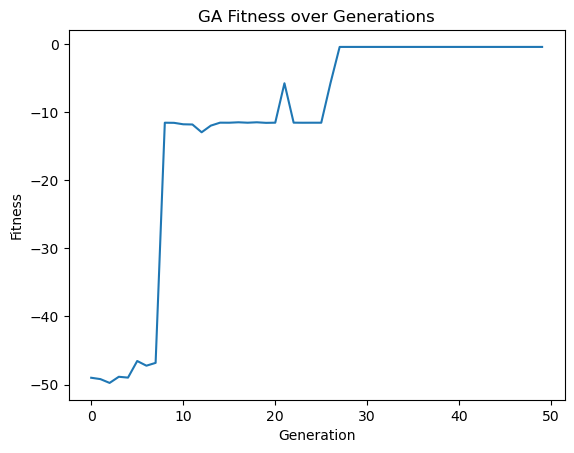

In [ ]:
# 1. Create synthetic data for a linear regression
X, y = make_regression(
    n_samples=200,
    n_features=30,
    n_informative=5, shuffle=False, # Change number of informative features here
    noise=0.5,
    random_state=1,
    
)

cols = [f"feat_{i}" for i in range(X.shape[1])]
R_df = pd.DataFrame(X, columns=cols)
y_df = pd.Series(y, name="target")

# Split into train/test
R_train, R_test, y_train, y_test = train_test_split(
    R_df, y_df, test_size=0.3, random_state=1
)

# 2. Run GA
ga = GeneticAlgorithm(
    max_gen=50,
    initial_ones=5,
    selection_type='roulette wheel',
    crossover_type='constrained',
    mutation_rate_per_pop=0.6,
    mutation_rate_per_chromosome=0.3
)
ga.fit(R_train, y_train, R_test, y_test) # GA uses prediction accuracy on test set to calculate the fitness

# 3. Output results
print("Selected features:", list(ga.best_features))

# 4. Plot fitness curve
fig, ax = ga.plot_fitness()
ax.set_title("GA Fitness over Generations")
    